# Import Libraries

In [2]:
import base64
import json
import requests
import io
from qiskit.circuit import qpy_serialization

In [5]:
def json_to_circuit(circuit_json):
    qpy_file = io.BytesIO(base64.b64decode(circuit_json))
    circuit = qpy_serialization.load(qpy_file)[0]
    return circuit

# Demo: Get a custom oracle for Deutsch-Jozsa Algorithm
params:<br>
'n' : Number of qubits.<br>
'case': 'b' for balanced, 'c' for constant.<br>
'measure' : Returns a measured circuit if passed with value "True".<br>


returns:<br>
'oracle': The circuit of the given oracle, in string format.

In [3]:
URL = 'https://qulib-oracle.herokuapp.com/demo/get_oracle'
p = {'n':'5','case':'b','measure':'True'}
response = requests.get(URL,params=p) 
response.json()

{'oracle': 'UUlTS0lUAwATAQAAAAAAAAABAAlpAAgAAAAGAAAABgAAAAAAAAAEAAAAAgAAAAAAAAAiY2lyY3VpdC05AAAAAAAAAABudWxscQEAAAAGAAFxAAAAAAAAAAEAAAACAAAAAwAAAAQAAAAFYwEAAAAGAAFjAAAAAAAAAAEAAAACAAAAAwAAAAQAAAAFAAAAAAAAAAAABQAAAAAAAAABAAAAAAAAAAAAAAAAAAAASEdhdGVxAAAAAAAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABIR2F0ZXEAAAABAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAEhHYXRlcQAAAAIABQAAAAAAAAABAAAAAAAAAAAAAAAAAAAASEdhdGVxAAAAAwAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABIR2F0ZXEAAAAEAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAFhHYXRlcQAAAAUABQAAAAAAAAABAAAAAAAAAAAAAAAAAAAASEdhdGVxAAAABQAHAAAAAAAAAAYAAAAAAAAAAAAAAAAAAABCYXJyaWVycQAAAABxAAAAAXEAAAACcQAAAANxAAAABHEAAAAFAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAFhHYXRlcQAAAAEABQAAAAAAAAABAAAAAAAAAAAAAAAAAAAAWEdhdGVxAAAAAgAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABYR2F0ZXEAAAADAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAFhHYXRlcQAAAAQABgAAAAAAAAACAAAAAAAAAAAAAAAAAAAAQ1hHYXRlcQAAAABxAAAABQAGAAAAAAAAAAIAAAAAAAAAAAAAAAAAAABDWEdhdGVxAAAAAXEAAAAFAAYAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAENYR2F0ZXEAAAACcQAAAAUABgAAAAAAAAACAAAAAAAAAAAAAAAAAAAA

Visualisation of quantum circuit for the Oracle function.

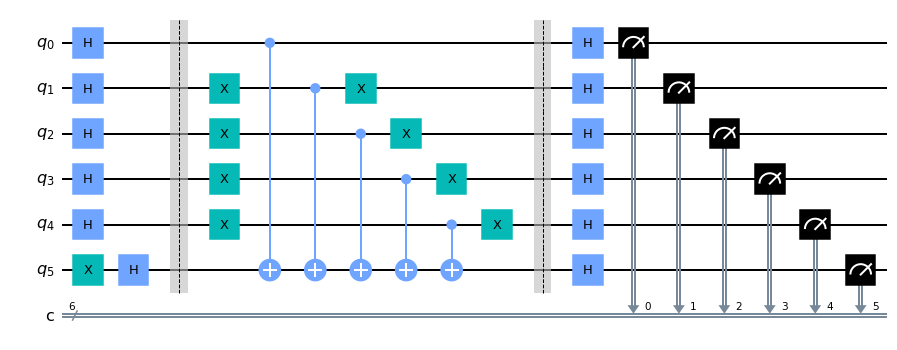

In [6]:
oracle = json_to_circuit(response.json()['oracle'])
oracle.draw(output='mpl')

# Demo: Get the type of a given oracle circuit using Deutsch-Jozsa Algorithm.

params:<br>
'circuit': QuantumCircuit for the oracle function, in string format.<br>
returns:<br>
'type': type of oracle function; <br>
Note: This function uses Qiskit's BasicAer simulator, which provides a noise free simulation.

In [7]:
key_URL = 'https://qulib-oracle.herokuapp.com/demo/get_type'
p={'circuit':response.json()['oracle']}
response = requests.get(key_URL,params=p)
response.json()

{'type': 'BALANCED'}

# Apply Deutsch-Jozsa Algorithm
<b>params:</b> <br>
'bitmap': Binary bitmap of oracle function, length should be in powers of 2.<br>
'key' : Unique API key for IBMQ Quantum Experience Account.<br>
returns:<br>
'type': The type of Oracle function corresponding to given bitmap.



In [17]:
URL3 = 'https://qulib-oracle.herokuapp.com/d_josza'
p3 = {'bitmap': '11101000', 'key':'Enter IBM-Q API Key'}
response = requests.get(URL3, params=p3)
response.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)